# Analyzing 2015 Car Crash Data with Machine Learning
Try to determine whether the driver was drunk or not using decision tree classifier.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/FARS2015/accident.csv")
df1 = pd.read_csv("../data/FARS2014/accident.csv")

In [3]:
df = df.append(df1,ignore_index=True)
df=df[df['WEATHER1']<20]

In [4]:
df_ml= df[['STATE','MONTH','DAY','DAY_WEEK','HOUR','DRUNK_DR','HARM_EV','WEATHER1','LATITUDE','LONGITUD']]
# df_ml1= df1[['STATE','MONTH','DAY','DAY_WEEK','HOUR','DRUNK_DR','HARM_EV','WEATHER1','LATITUDE','LONGITUD']]
# df_ml= df[['STATE','MONTH','DAY_WEEK','DAY','HOUR','WEATHER1','HARM_EV','DRUNK_DR','LATITUDE','LONGITUD','PERSONS','PERMVIT']]



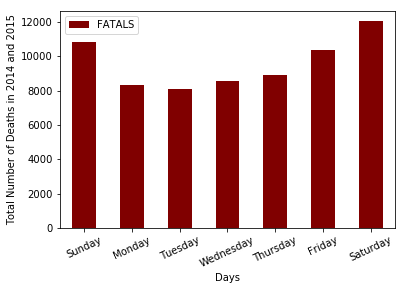

In [5]:
df_dayofweek = df.groupby(["DAY_WEEK"],as_index=False).sum()
df_dayofweek["FATALS"]
daysDic = {1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday"}
df_dayofweek["DAY_WEEK_NAMES"] = df_dayofweek["DAY_WEEK"].apply(lambda x: daysDic[x])
# df_dayofweek = df_dayofweek[["FATALS","DAY_WEEK"]]

# fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
df_dayofweek.plot(x="DAY_WEEK_NAMES", y="FATALS", kind="bar",color="maroon")
plt.xlabel('Days')
plt.ylabel('Total Number of Deaths in 2014 and 2015')
plt.xticks(rotation=25)
plt.savefig('../fig/AccidentsPerWeekDays.pdf')
plt.show()

In [6]:
df_ml = pd.concat([df_ml, pd.get_dummies(df_ml['STATE'], prefix ='STATE')], axis=1)
df_ml = pd.concat([df_ml, pd.get_dummies(df_ml['MONTH'], prefix ='MONTH')], axis=1)
df_ml = pd.concat([df_ml, pd.get_dummies(df_ml['DAY_WEEK'], prefix ='DAY_WEEK')], axis=1)
df_ml = pd.concat([df_ml, pd.get_dummies(df_ml['DAY'], prefix ='DAY')], axis=1)
df_ml = pd.concat([df_ml, pd.get_dummies(df_ml['HOUR'], prefix ='HOUR')], axis=1)
df_ml = pd.concat([df_ml, pd.get_dummies(df_ml['WEATHER1'], prefix ='WEATHER1')], axis=1)
df_ml = pd.concat([df_ml, pd.get_dummies(df_ml['HARM_EV'], prefix ='HARM_EV')], axis=1)

In [7]:
df_ml = df_ml.drop(['STATE','DAY','MONTH','DAY_WEEK','HOUR','HARM_EV','WEATHER1'],axis=1)
X = df_ml.drop(['DRUNK_DR'],axis=1)
y = df_ml['DRUNK_DR']

In [33]:

accuracy_arr = []
depth_arr = []
for i in range(2,15,1):
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(X.values, y)
    scores = cross_val_score(dt, X, y, cv = 2)
    depth_arr.append(i)
    accuracy_arr.append(scores.mean())
#     print(scores)
    print("Max_Depth = ", i ," Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Max_Depth =  2  Accuracy: 0.71403 (+/- 0.00383)
Max_Depth =  3  Accuracy: 0.72549 (+/- 0.00344)
Max_Depth =  4  Accuracy: 0.73400 (+/- 0.00344)
Max_Depth =  5  Accuracy: 0.73862 (+/- 0.00509)
Max_Depth =  6  Accuracy: 0.74677 (+/- 0.00678)
Max_Depth =  7  Accuracy: 0.75041 (+/- 0.00619)
Max_Depth =  8  Accuracy: 0.74541 (+/- 0.01652)
Max_Depth =  9  Accuracy: 0.74354 (+/- 0.02253)
Max_Depth =  10  Accuracy: 0.74007 (+/- 0.02681)
Max_Depth =  11  Accuracy: 0.74000 (+/- 0.02519)
Max_Depth =  12  Accuracy: 0.73999 (+/- 0.02509)
Max_Depth =  13  Accuracy: 0.73953 (+/- 0.02548)
Max_Depth =  14  Accuracy: 0.73794 (+/- 0.02542)


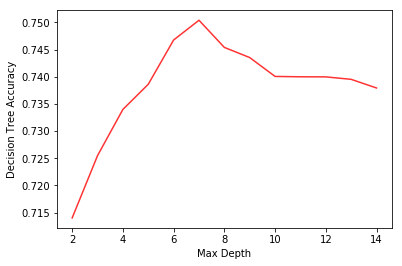

In [34]:
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.plot(depth_arr,accuracy_arr, alpha=0.8,color='r')
plt.xlabel('Max Depth')
plt.ylabel('Decision Tree Accuracy')
# plt.title("Decision Tree Accuracy Depth")
fig.savefig('../fig/DecisionTreeAccuracy.pdf')
plt.show()
plt.close(fig) # close the figure

In [29]:
from sklearn.neighbors import KNeighborsClassifier
accuracyknn_arr = []
knn_arr = []
for i in range(5,55,5):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X.values, y)
    scores = cross_val_score(neigh, X, y, cv = 2)
    accuracyknn_arr.append(scores.mean())
    knn_arr.append(i)
    print("knn = ",i," Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

knn =  5  Accuracy: 0.68800 (+/- 0.03237)
knn =  10  Accuracy: 0.70344 (+/- 0.03669)
knn =  15  Accuracy: 0.70437 (+/- 0.03523)
knn =  20  Accuracy: 0.70408 (+/- 0.03730)
knn =  25  Accuracy: 0.70451 (+/- 0.03753)
knn =  30  Accuracy: 0.70395 (+/- 0.03951)
knn =  35  Accuracy: 0.70326 (+/- 0.03776)
knn =  40  Accuracy: 0.70171 (+/- 0.03821)
knn =  45  Accuracy: 0.70138 (+/- 0.03899)
knn =  50  Accuracy: 0.70135 (+/- 0.04036)


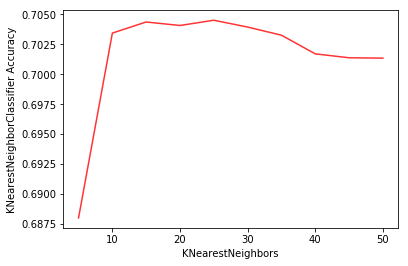

In [30]:
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.plot(knn_arr,accuracyknn_arr, alpha=0.8,color='r')
plt.xlabel('KNearestNeighbors')
plt.ylabel('KNearestNeighborClassifier Accuracy')
# plt.title("Decision Tree Accuracy Depth")
fig.savefig('../fig/KNNAccuracy.pdf')
plt.show()
plt.close(fig) # close the figure

In [31]:
from sklearn.ensemble import RandomForestClassifier
accuracyrforest_arr = []
rforest_arr = []
for i in range(5,50,5):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(X.values, y)
    scores = cross_val_score(clf, X, y, cv = 2)
    accuracyrforest_arr.append(scores.mean())
    rforest_arr.append(i)
    print("knn = ",i," Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))


knn =  5  Accuracy: 0.70458 (+/- 0.02331)
knn =  10  Accuracy: 0.70544 (+/- 0.03789)
knn =  15  Accuracy: 0.71992 (+/- 0.04282)
knn =  20  Accuracy: 0.72523 (+/- 0.04824)
knn =  25  Accuracy: 0.73000 (+/- 0.04052)
knn =  30  Accuracy: 0.72924 (+/- 0.04243)
knn =  35  Accuracy: 0.72908 (+/- 0.03866)
knn =  40  Accuracy: 0.72667 (+/- 0.04113)
knn =  45  Accuracy: 0.72312 (+/- 0.03714)


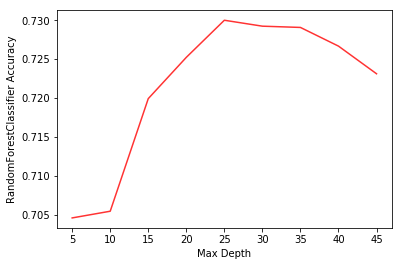

In [32]:
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.plot(rforest_arr,accuracyrforest_arr, alpha=0.8,color='r')
plt.xlabel('Max Depth')
plt.ylabel("RandomForestClassifier Accuracy")
# plt.title("Decision Tree Accuracy Depth")
fig.savefig('../fig/RForestAccuracy.pdf')
plt.show()
plt.close(fig) # close the figure

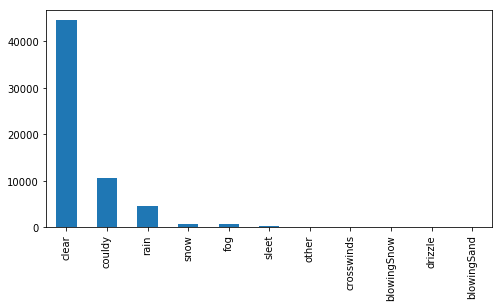

In [271]:
df['WEATHER'].value_counts()
weather = {1:'clear',10:'couldy',2:'rain',5:'fog',4:'snow',99:'unknown',3:'sleet',98:'unreported',8:'other',12:'drizzle',11:'blowingSnow',6:'crosswinds',7:'blowingSand'}

df['weather']=df['WEATHER'].apply(lambda x: weather[x] )
df['weather'].value_counts().plot.bar(figsize=(8,4))
plt.show()


In [272]:
df_date = df[["DAY","MONTH","YEAR","FATALS"]]

In [275]:
df_date['DATE'] = df['YEAR'].astype(str)+"-"+df['MONTH'].astype(str)+"-"+df['DAY'].astype(str)
# df_date

/Users/sdurgut/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [278]:
df_date["DATE"] = pd.to_datetime(df_date["DATE"])

/Users/sdurgut/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [284]:
df_date = df_date.drop(["DAY","YEAR","MONTH"],axis=1)

In [291]:
df_date = df_date.groupby(["DATE"]).agg(sum)

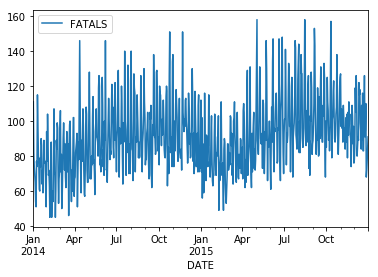

In [298]:
df_date.plot()
# df_date.rollingmean(window=30).plot()
plt.show()

In [331]:
# df